# 1. pandas 라이브러리 import 하기

In [5]:
import numpy as np
import pandas as pd

In [6]:
from pandas import Series, DataFrame # pandas  자료구조

import matplotlib.pyplot as plt #시각화

In [7]:
np.random.seed(12345)

plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 폰트 변경 정보

# 2. Series  
    * 일련의 객체를 담을 수 있는 1차원 데이터(스칼라, 리스트, 튜플, 사전) 벡터 같은 자료구조
    * 파이썬의 일차원 데이터를 저장, 처리, 분석을 위한 다양한 기능들을 제공
    * 인덱스와 값으로 구성


## 2.1 Series 생성


### 1) List를 사용하여 Series 생성
* pd.Series(리스트, index=)
    *  pd 인 이유는 import pandas as pd
* Series(리스트)

In [8]:
data = [4,7,-5,3] #파이썬의 리스트  타입 변수
obj = pd.Series(data, index=["a","b","c","d"]) # Series([4,7,-5,3])
obj # 시리즈 객체 : 색인(0부터 시작)과 데이터

a    4
b    7
c   -5
d    3
dtype: int64

### 2) Tuple을 이용하여 Series 생성하기

In [9]:
arr = (3,4,1,2) # tuple 타입
data2 = pd.Series(arr, index = ['o','t','th','f'])
data2

o     3
t     4
th    1
f     2
dtype: int64

### 3) Dict을 이용하여 Series 생성하기

In [10]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000} #dict
# dict의 메서드
sdata.keys()
sdata.values()
sdata.items()
obj3 = pd.Series(sdata) # Series  객체의 색인은 딕셔너리의 keys 메서드에서 
                        # 반환하는 키의 값 순서대로 들어감
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

## ** 몇 가지  Series 특징들 **
* Series.values 는 numpy의 ndarray 객체

In [11]:
data = obj3.values # Series의 저장된 값들을 가져오기
print(data)
type(obj3.values)

[35000 71000 16000  5000]


numpy.ndarray

* 값에는 모든 데이터 타입 사용이 가능

In [12]:
obj3.to_dict() # series -> python dictionary 변환

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

## 2.2 Series의 주요 속성 및 메서드 (p.199)
* 시리즈.속성
* 시리즈.메서드()

* index - Series의 인덱스(혹은 인덱스 라벨) 

In [13]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
states = ["California", "Ohio", "Oregon", "Texas"] 
obj4 = pd.Series(sdata, index=states)
obj4

# NaN (Not a Number) - null, 결측치

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [14]:
obj4.index

Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object')

shape - Series의 데이터 개수를 튜플로 반환

In [15]:
print(obj4)
obj4.shape

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


(4,)

* values - Series의 데이터

In [16]:
obj4.values

array([   nan, 35000., 16000., 71000.])

* size - Series의 크기(데이터의 길이) 

In [17]:
print(obj4)
print()
obj4.size

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64



4

* dtype - Series의 데이터(Series.values)의 데이터 타입
  * int64
  * float64
  * object - 문지열이거나 2개 이상의 데이터 타입으로 이루어진 경우

In [18]:
obj4.dtype

dtype('float64')

In [19]:
#ex
s = Series([2,3.5,'abc'])
print(s)
print()
s.dtype

0      2
1    3.5
2    abc
dtype: object



dtype('O')

* describe() - 통계 정보를 한 눈에 제공해주는 함수

In [20]:
obj4.describe()

count        3.000000
mean     40666.666667
std      27934.447074
min      16000.000000
25%      25500.000000
50%      35000.000000
75%      53000.000000
max      71000.000000
dtype: float64

* 통계함수 - max(), min(), mean()..  

In [21]:
obj4.max()

71000.0

In [22]:
obj4.mean()

40666.666666666664

In [23]:
obj4.min()

16000.0

* isna() - 누락된 데이터를 찾을 때 불리언 배열을 반환
* notna() -누락되지 않은 데이터을 찾을 때 불리언 배열로 반환

In [24]:
obj4.isna()  # boolean 시리
# pd.notna(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

* value_counts() - Series에 있는 데이터 값들의 개수

In [25]:
print(obj4)
obj4.value_counts()

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


35000.0    1
16000.0    1
71000.0    1
Name: count, dtype: int64

### 시리즈 간 산술 연산
* 시리즈1.add(시리즈2) - Series의 데이터 각각에 값을 더하기
* 시리즈1.sub(시리즈2) - Series의 데이터 각각에 값을 빼기
* 시리즈1.mul(시리즈2) - Series의 데이터 각각에 값을 곱하기
* 시리즈1.div(시리즈2) - Series의 데이터 각각에 값을 나누기

In [26]:
print(obj3)
print()
print(obj4)
print()
obj3 + obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64



California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [27]:
obj3.add(obj4)

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

### [Quiz] 시리즈 obj4의 데이터에 1000을 더하시오

In [28]:
a = (obj4 + 1000)
print(a)


California        NaN
Ohio          36000.0
Oregon        17000.0
Texas         72000.0
dtype: float64


* series.isin(val_list) - Series에 있는 각각의 데이터를 vali_list 에 포함되어 있는지 여부를 확인하여 불리언 배열 반환

cf) val_list in series

In [36]:
sample = Series(data=[89,90,78,65,90,100,78,55,40,90], index=['a','b','c','d','e','f','g','h','i','j'])
print(sample)
# sample.isin([89])

a     89
b     90
c     78
d     65
e     90
f    100
g     78
h     55
i     40
j     90
dtype: int64


### [Quiz] sample 데이터 내에 90, 89가 있는지 확인하시오

In [35]:
sample.isin([90, 89])

a     True
b     True
c    False
d    False
e     True
f    False
g    False
h    False
i    False
j     True
dtype: bool

### [Quiz] sample 데이터 내에 90이 있으면 True, 없으면 False을 출력

In [41]:
sample.isin([90])

a    False
b     True
c    False
d    False
e     True
f    False
g    False
h    False
i    False
j     True
dtype: bool

### [Quiz] sample 인덱스 내에 'b' 있는지 True, 없으면 False을 출력

In [42]:
sample.index.isin(['b'])

array([False,  True, False, False, False, False, False, False, False,
       False])

## 매우매우 중요
* 시리즈.apply(func) - Series의 데이터에 func 함수를 적용하기 위한 함수
* apply(lambda X: func(함수 또는 처리 연산))

In [43]:
# 60 이상이면 pass, 60 미만이면 fail로 변경하는 함수
print(sample)

print()

def pass_fail(val):
    if val >= 60:
        return 'pass'
    else:
        return 'fail'

# 함수 적용
sample.apply(pass_fail)


a     89
b     90
c     78
d     65
e     90
f    100
g     78
h     55
i     40
j     90
dtype: int64



a    pass
b    pass
c    pass
d    pass
e    pass
f    pass
g    pass
h    fail
i    fail
j    pass
dtype: object

In [44]:
pd.core.series.Series

pandas.core.series.Series

In [45]:
# 익명함수로 코딩
sample.apply(lambda val: 'pass' if val >= 60 else 'fail')

a    pass
b    pass
c    pass
d    pass
e    pass
f    pass
g    pass
h    fail
i    fail
j    pass
dtype: object

## 2.3 Series 객체와 색인의 이름 지정하기
    * Series.name
    * Series.index.name

In [46]:
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

## 2.4 원하는 데이터만 선택하기 (p.205~208 색인하기, 선택하기, 거르기)
* 인덱스를 활용하여 특정 인덱스(들)에 해당하는 데이터 선택
  + 시리즈[인덱스]
* 인덱스 슬라이싱으로 주어진 범위에 해당하는 데이터를 선택
  + 시리즈[start:end:step]
* 조건 색인(불리언 색인)을 활용하여 조건에 맞는 데이터 선택

    1) 특정 인덱스 선택하기 : 숫자 인덱스와 인덱스 라벨 모두 사용 가능

In [47]:
list(range(10))
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


### 넘파이 1차원 배열로 시리즈 생성하기

In [48]:
obj = pd.Series(np.arange(4.0), index=["a", "b", "c", "d"])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [49]:
obj["b"] # 인덱스 라벨로 선택

1.0

    2) 여러 인덱스를 동시에 선택하기 : 선택하고자 하는 인덱스 목록을 리스트로 전달

In [50]:
obj[["b","d"]]  # 2, 4번쩨 데이터 선택 - 순서X

b    1.0
d    3.0
dtype: float64

In [51]:
obj[['b','d']]

b    1.0
d    3.0
dtype: float64

    3) 인덱스 슬라이싱 - 주어진 범위에 해당하는 데이터 선택

In [52]:
obj[1:3] #1,2

b    1.0
c    2.0
dtype: float64

In [53]:
obj[-3:-1]

b    1.0
c    2.0
dtype: float64

In [54]:
obj['b':'c'] # 레이블별 인덱스는 포함

b    1.0
c    2.0
dtype: float64

In [55]:
obj.loc[['b','c']]

b    1.0
c    2.0
dtype: float64

In [56]:
obj.iloc[[1,2]]

b    1.0
c    2.0
dtype: float64

    4) **조건 색인(블리언 인덱싱)** : 조건 색인을 활용하여 원하는 데이터 선택

In [57]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [58]:
# 1. 조건식 정의
bool_index = obj < 2 # 조건 색인
bool_index

a     True
b     True
c    False
d    False
dtype: bool

In [59]:
# 2. 조건 색인을 이용하여 True에 해당하는 데이터 추출 -> 새로운 시리즈
obj[bool_index]

a    0.0
b    1.0
dtype: float64

In [62]:
print(sample)

a     89
b     90
c     78
d     65
e     90
f    100
g     78
h     55
i     40
j     90
dtype: int64


### [Quiz] sample 데이터에서 80 이상 데이터을 선택하시오.
    sample = Series(data=[89,90,78,65,90,100,78,55,40,90], index=['a','b','c','d','e','f','g','h','i','j'])

In [65]:
select_data = sample[sample >= 80]
print(select_data)

a     89
b     90
e     90
f    100
j     90
dtype: int64


### [Quiz] sample 데이터의 평균보다 작은 데이터만 선택하시오.

In [68]:
avg_data = sample[sample < sample.mean()]
print(avg_data)

d    65
h    55
i    40
dtype: int64


### [Quiz] sample 데이터가 60과 80 사이의 데이터만 선택

In [69]:
between_data = sample[(sample > 60) & (sample < 80)]
print(between_data)

c    78
d    65
g    78
dtype: int64


# 3. DataFrame
* 이차원 형태의 데이터을 저장, 처리, 관리, 분석하기 위한 자료구조
* 이차원 데이터는 여러 개의 1차원 데이터들의 모임
* 여러 개의 Series의 묶음
* 표 같은 스프레드시트 형식의 자료구조
  * 여러 개의 열이 존재하고 서로 다른 종류의 값(숫자, 문지열, 시계열, 불리언 등) 을 담을 수 있다.
* 2차원 형태의 데이터(값, value)와 2개의 인덱스(index) 즉 행과 열로 구성
  * row index는 순서가 존재
    * 숫자 인덱스나 문자 인덱스로 색인 가능
    * axis = 0
  * column index는 순서가 존재하지 않음
    * axis = 1
  * 2차원 형태의 데이터 타입에는 제약이 없음
* 생성하는 방법
  * 동일한 길이의 리스트에 담긴 딕셔너리를 이용
  * 넘파이 배열을 이용

## 3.1 중첩리스트을 이용하여 DataFrame 생성

In [72]:
#1. Pandas 라이브러리 임포트
import pandas as pd
from pandas import Series, DataFrame
# 2. DataFrame 생성하고 데이터 할당하기 : 로우 인덱스와 컬럼 인덱스을  지정하지 않을 경우 기본값으로 할당
df = DataFrame(data = [[1,2,3],
                       ['kim','park','lee'],
                       [90, 80, 100]
                      ])
df

,0,1,2
0,1,2,3
1,kim,park,lee
2,90,80,100


In [73]:
#3. 로우 인덱스와 컬럼 인덱스 지정하기
df1 = DataFrame(data = [[1,2,3],
                       ['kim','park','lee'],
                       [90, 80, 100]], index = ['r1','r2','r3'], columns =['c1','c2','c3'])
df1

,c1,c2,c3
r1,1,2,3
r2,kim,park,lee
r3,90,80,100


## 3.2 딕셔너리을 이용하여 DataFrame 생성하기

In [74]:
#1. 딕셔너리 타입 데이터를 생성하기 - 키값이 컬럼에 대응
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [75]:
# 2. 인덱스 변경
frame.index = ['a','b','c','d','e','f']
frame

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


### [Quiz] 2021, 2022, 2023년 3년간 대전, 대구, 부산, 광주, 원주의 5개 도시의 인구 수을 저장하는 데이터프레임 생성하기

    data = {'서울': [950, 945, 938], 
        '대전': [800, 790, 780],
        '부산': [920, 910, 900],
        '광주': [700, 690, 680],
        '원주': [300, 290, 250]
       }

In [76]:
# 데이터 생성
data = {'서울': [950, 945, 938], 
        '대전': [800, 790, 780],
        '부산': [920, 910, 900],
        '광주': [700, 690, 680],
        '원주': [300, 290, 250]
       }

# 인덱스 생성
year = [2021, 2022, 2023]

# DataFrame생성
df = pd.DataFrame(data, index=year)

print(df)


       서울   대전   부산   광주   원주
2021  950  800  920  700  300
2022  945  790  910  690  290
2023  938  780  900  680  250


## 3.3 DataFrame 의 주요 기능 : 속성과 함수 
* 데이터 통계, 정렬, 집계 등
* 컬럼 추가, 삭제 (5주차)

### 3.3.1 주요 속성
* 변수명.속성명

In [77]:
# 1. index : 데이터프레임의 인덱스를 리스트로 반환
print(frame)
frame.index

    state  year  pop
a    Ohio  2000  1.5
b    Ohio  2001  1.7
c    Ohio  2002  3.6
d  Nevada  2001  2.4
e  Nevada  2002  2.9
f  Nevada  2003  3.2


Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [78]:
# 2. columns : 데이터프레임의 컬럼을 리스트로 반환
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [79]:
# 3. values : 데이터프레임의 데이터 반환(numpy.ndarray)
frame.values
# type(frame.values)

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [80]:
# 4. shape : 행과 열의 개수을 튜플로 반환
frame.shape

(6, 3)

In [81]:
frame.head() # 처음 5개행을 출력

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9


In [55]:
# 5. T (Transpose) : 행과 열 바꾸기
print(frame)
print(frame.T)

    state  year  pop
a    Ohio  2000  1.5
b    Ohio  2001  1.7
c    Ohio  2002  3.6
d  Nevada  2001  2.4
e  Nevada  2002  2.9
f  Nevada  2003  3.2
          a     b     c       d       e       f
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
year   2000  2001  2002    2001    2002    2003
pop     1.5   1.7   3.6     2.4     2.9     3.2


In [82]:
# 7. dtypes : 컬럼별 데이터타입 반환
frame.dtypes

state     object
year       int64
pop      float64
dtype: object

In [83]:
# 8. size : 데이터프레임의 원소의 개수를 반환
frame.size

18

### 3.3.2 주요 함수
* 변수명.함수명()

In [84]:
# 1. info() - 데이터프레임의 기본 정보 출력
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   6 non-null      object 
 1   year    6 non-null      int64  
 2   pop     6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.0+ bytes


In [85]:
# 2. describe() -  숫자형 컬럼별 기본적인 통계 정보 출력
frame.describe()

,year,pop
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


In [86]:
# 3. 통계함수 (mean(), sum(), max(), min(),quantile()...)
frame[['year','pop']].mean()
frame[['year','pop']].sum()
frame[['year','pop']].max()
frame[['year','pop']].min()

year    2000.0
pop        1.5
dtype: float64

In [87]:
# 4. sample(개수) : 전체 데이터의 일부 데이머를 랜덤으로 선택
frame.sample(2, axis = 0)
frame.sample(2, axis = 1)

,state,year
a,Ohio,2000
b,Ohio,2001
c,Ohio,2002
d,Nevada,2001
e,Nevada,2002
f,Nevada,2003


In [88]:
# 5.head(x), tail(x) - 맨 앞 혹은 맨 뒤 x 개의 데이터 출력

In [89]:
frame.head()
frame.tail() 

,state,year,pop
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


In [90]:
# 6. nunique() : - 컬럼별 unique한 값의 개수
frame
frame.nunique()

state    2
year     4
pop      6
dtype: int64

<Axes: >

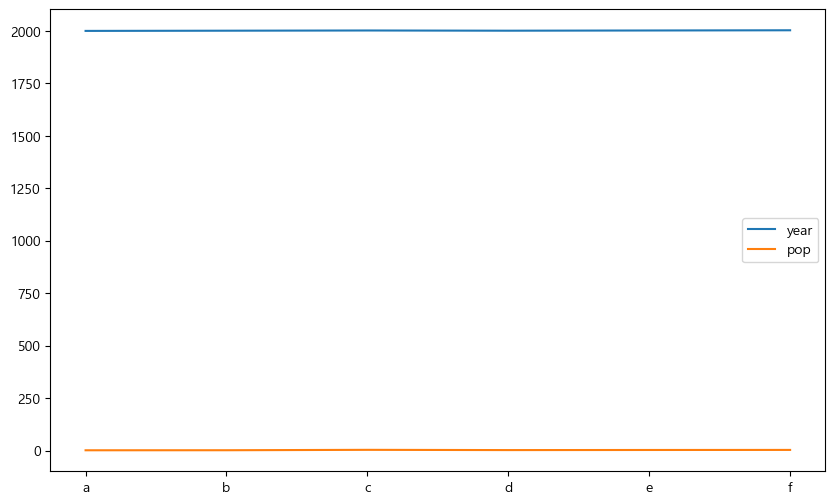

In [91]:
# 7. plot() - 데이터 시각화
frame.plot()


<Axes: >

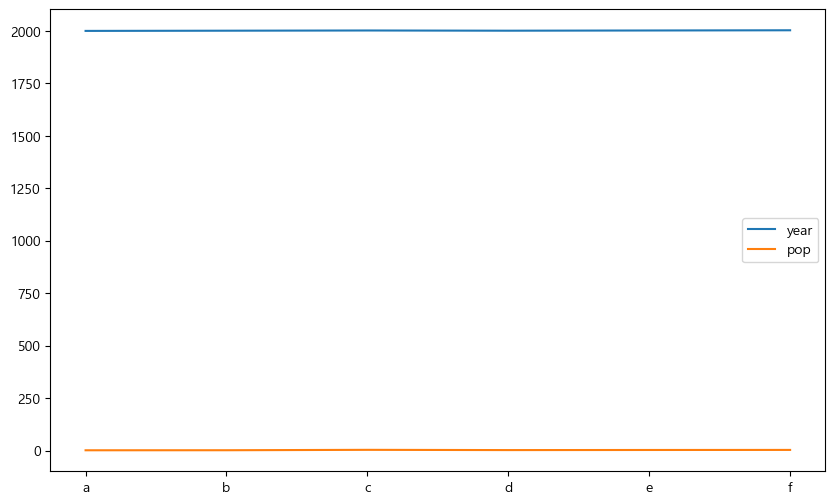

In [92]:
frame.plot()

### 3.3.3 DateFrame의 원하는 데이터만 선택하기 (p.209, 213)
* 인덱싱을 활용하여 원하는 데이터 선택
* 원하는 컬럼들만 선택
* 원하는 로우들만 선택
* 인덱싱 슬라이싱으로 특정 범위 데이터 선택
* 조건색인으로 특정 조건에 부합되는 데이터 선택

In [93]:
np.random.randn(10)

array([ 0.5951,  0.0418,  0.8004, -0.0719, -1.0431, -0.3812, -0.7661,
       -1.5774,  0.4882,  1.1803])

<Axes: >

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


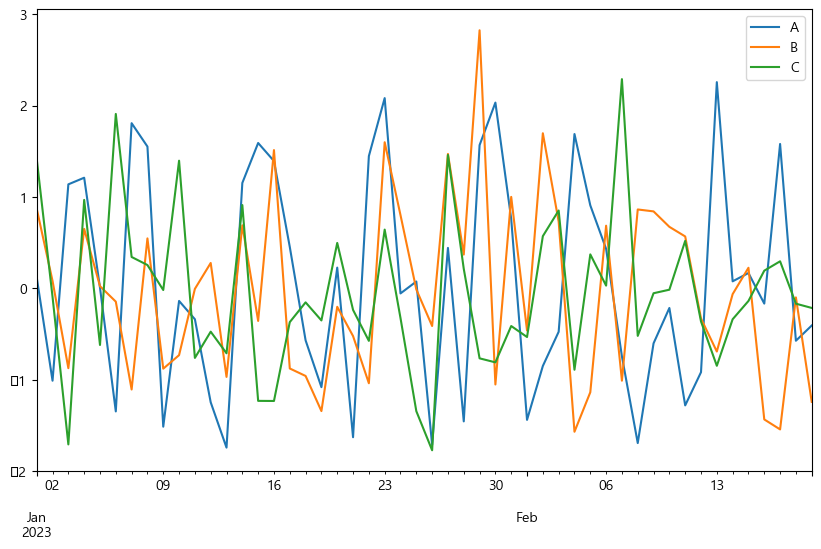

In [94]:
df2 = pd.DataFrame(np.random.randn(50,3),
                   index = pd.date_range('1/1/2023', periods = 50),
                   columns = ['A','B','C'])
df2.plot()

In [95]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
pd.DataFrame(data, columns=["year", "state", "pop"]) # columns을 원하는 순서대로 지정

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [96]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop"])
frame2
frame2.columns

Index(['year', 'state', 'pop'], dtype='object')

* 원하는 열(컬럼)만 조회하기

In [97]:
frame

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


In [98]:
# 1) state만 조회
frame["state"]
type(frame['state']) # Series 객체
# frame2.state

pandas.core.series.Series

In [99]:
# 2) year와 pop 조회하기 - 색인 기호 안에 조회할 2개 이상의 컬럼명들을 리스트로 작성
frame[['year','pop']]

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4
e,2002,2.9
f,2003,3.2


* 특정 행만 선택 - df.loc[행_레이블], df.iloc[행_위치] (p.211)

* 인덱스 슬라이싱
  * 범위 값을 주고, 그 범위에 해당하는 데이터를 색인하는 방법
  * 숫자, 문자인덱스 모두 슬라이싱 가능

In [100]:
frame2

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [101]:
frame2.loc[1:3]

,year,state,pop
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4


In [102]:
frame2.iloc[1:3]

,year,state,pop
1,2001,Ohio,1.7
2,2002,Ohio,3.6


In [103]:
frame2[1:3] # loc, iloc 생략

,year,state,pop
1,2001,Ohio,1.7
2,2002,Ohio,3.6


* 2개의 인덱스를 모두 사용 색인 - 원하는 행과 열을 선택하여 조회하기
 

In [104]:
frame2

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [105]:
frame2[['year','pop']].loc[1:4] # 2번째부터 4번째의 year와 pop 선택 -열을 먼저 선택하고 행 선택

,year,pop
1,2001,1.7
2,2002,3.6
3,2001,2.4
4,2002,2.9


In [106]:
frame2.loc[1:4][['year','pop']] # 행을 먼저 선택 후 열을 선택

,year,pop
1,2001,1.7
2,2002,3.6
3,2001,2.4
4,2002,2.9


In [107]:
frame2.loc[[1,2,3], ['year','pop']] # 행과 열을 동시에 명시

,year,pop
1,2001,1.7
2,2002,3.6
3,2001,2.4


In [108]:
frame2.loc[1:4, ['year','pop']] # 행과 열을 동시에 슬라이싱

,year,pop
1,2001,1.7
2,2002,3.6
3,2001,2.4
4,2002,2.9


In [109]:
frame2.loc[:,['year', 'pop']] # 전체의 year & prop 가져오기

,year,pop
0,2000,1.5
1,2001,1.7
2,2002,3.6
3,2001,2.4
4,2002,2.9
5,2003,3.2


* 조건 색인

In [110]:
# pop가 2.5이상인 행 데이터 선택
frame2['pop'] >= 2.5
frame2[frame2['pop'] >= 2.5]

,year,state,pop
2,2002,Ohio,3.6
4,2002,Nevada,2.9
5,2003,Nevada,3.2


## 3.4 DataFrame의 산술 연산 (p.218)
* 서로 다른 색인을 가지고 있는 객체 간의 산술연산 처리

In [111]:
# 1) 1차원 데이터 간의 연산 : 짝이 맞지 않는 색인이 있는 경우 결과에 두 색인 통합된다.
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a','c','d','e'])
print(s1)
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index =['a','c','e','f','g'])
print(s2)
s1 + s2  # 서로 겹치는 색인이 없는 경우 데이터는 결측치가 된다. 추후 산술 연산 시 누락돈 값이 전달됨

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [112]:
# 2)1차원 데이터 간의 산술 연산 : 같은 색인 라벨의 값들끼리 산술 연산이 수행
sr1 = pd.Series([4500, 2800, 3000], index = ['a','b','c'])
sr2 = pd.Series([4800, 3500, 2500], index = ['a','b','c'])
sr1 + sr2

a    9300
b    6300
c    5500
dtype: int64

In [113]:
# 3) 1차원 데이터와 값 간의 연산 : series + 스칼라 (broadcasting)
sr = pd.Series([3,5,7])
sr + 10

0    13
1    15
2    17
dtype: int64

## 3.6 DataFrame 변경하기 (p. 203)
* 새로운 컬럼 추가 (p.192)
  * 고정 값 할당
  * 기존 컬럼에 함수를 적용한 결과 할당(p.226)
  * 기존 컬럼들의 산술 연산 결과 할당
* 불필요한 컬럼 또는 데이터 삭제하기(p.203)

    1) 컬럼 추가 하기 -고정 값 할당(p.192)

In [114]:
frame2["debt"] = 16.5 # 'debt' 컬럼추가 후, 값을 모두 16.5로 저장
frame2

frame2["debt"] = np.arange(6.) #원본 데이터프레임의 행의 개수와 신규로 할당되는 리스트나 배열 값의 개수가 일치
frame2

frame2["debt"] = [2.3,2.7,2.6,3.4,3.9,4.2]
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,2.3
1,2001,Ohio,1.7,2.7
2,2002,Ohio,3.6,2.6
3,2001,Nevada,2.4,3.4
4,2002,Nevada,2.9,3.9
5,2003,Nevada,3.2,4.2


In [115]:
# Series를 대입하면 DataFrame의 색인에 따라 값이 대입되며 존재하지 않는 색인에는 결측치가 대입됨
val = pd.Series([-1.2, -1.5, -1.7],  index=["two", "four", "five"])
val.shape
frame2["debt"] = val  # Series 객체는 기존 데이터프레임의 shape, index 이름이 동일해야만 추가 가능
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [116]:
frame2["state"] == "Ohio" # 존재하지 않는 열을 대입할 경우에는 새로운 열이 생성
frame2["eastern"] = frame2["state"] == "Ohio" # 기존 컬럼에 조건 색인을 적용한 결과을 추가
frame2

,year,state,pop,debt,eastern
0,2000,Ohio,1.5,NaN,True
1,2001,Ohio,1.7,NaN,True
2,2002,Ohio,3.6,NaN,True
3,2001,Nevada,2.4,NaN,False
4,2002,Nevada,2.9,NaN,False
5,2003,Nevada,3.2,NaN,False


    2) 컬럼 추가하기 : 기존 컬럼에 함수를 적용한 결과로 값을 할당

In [117]:
# p.226
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.random.standard_normal((4,3)),
                     columns = list("bde"),
                     index = ["Utah", "Ohio","Texas", "Oregon"])
frame

# 각 행이나 열의 1차원 배열에 함수를 적용하기 위한 함수: DataFrame.apply(함수, axis=)
#1. 함수 정의
def f1(x):
    return x.max() - x.min()
#2. 이 함수을 각 열에 적용하기-> 열을 색인으로 하는 Series 반환
frame.apply(f1, axis = 0)
# 3. 이 함수을 각 행에 적용하기 -> 행을 색인으로 하는 Series 반환
frame.apply(f1, axis = 1)

Utah      3.697246
Ohio      1.881773
Texas     0.238270
Oregon    1.376197
dtype: float64

In [118]:
# p.227
np.random.seed(1)
print(frame)
def f2(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f2)
                     

               b         d         e
Utah   -0.466055 -1.830003  1.867243
Ohio   -0.246125  0.763445  1.635648
Texas   0.005104  0.014885 -0.223385
Oregon  0.985216 -0.390981  0.321918


,b,d,e
min,-0.466055,-1.830003,-0.223385
max,0.985216,0.763445,1.867243


### [Quiz] 데이터프레임 frame2에 poplevel 컬럼을 추가하고, pop이 2.5 이상이면 "high", 2.5보다 작으면 "low"로 값을 저장하기

In [123]:
# poplevel 칼럼 추가 및 None으로 초기화
frame2['poplevel'] = None

# pop이 2.5 이상이면 "high", 2.5보다 작으면 "low"로 값을 저장하기
frame2.loc[frame2['pop'] >= 2.5, 'poplevel'] = 'high'
frame2.loc[frame2['pop'] < 2.5, 'poplevel'] = 'low'

print(frame2)


   year   state  pop  debt  eastern poplevel
0  2000    Ohio  1.5   NaN     True      low
1  2001    Ohio  1.7   NaN     True      low
2  2002    Ohio  3.6   NaN     True     high
3  2001  Nevada  2.4   NaN    False      low
4  2002  Nevada  2.9   NaN    False     high
5  2003  Nevada  3.2   NaN    False     high


    3) 기존 컬럼들의 산술 연산 결과 할당

In [94]:
# perDebt 컬럼을 추가하고, debt을 pop의 값을 나눈 값으로 할당하기
frame2['perDebt'] = frame2['debt']/frame2['pop']
frame2

,year,state,pop,debt,eastern,perDebt
0,2000,Ohio,1.5,NaN,True,NaN
1,2001,Ohio,1.7,NaN,True,NaN
2,2002,Ohio,3.6,NaN,True,NaN
3,2001,Nevada,2.4,NaN,False,NaN
4,2002,Nevada,2.9,NaN,False,NaN
5,2003,Nevada,3.2,NaN,False,NaN


### 4) 기존 컬럼들의 삭제 : del 

In [95]:
del frame2["eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'perDebt'], dtype='object')

    5) 재색인 : reindex(리스트)

In [96]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [97]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [98]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3
obj3.reindex(np.arange(6), method="ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [99]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])
frame
frame2 = frame.reindex(index=["a", "b", "c", "d"])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [100]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [101]:
frame.reindex(states, axis="columns")

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [102]:
frame.loc[["a", "d", "c"], ["California", "Texas"]]

,California,Texas
a,2,1
d,8,7
c,5,4


## # 데이터 삭제하기 :Series, DataFrame
* drop(삭제할 리스트, axis=0)
* drop(index= 행_리스트)
* drop(columns= 열_리스트)

In [103]:
obj = pd.Series(np.arange(5.), index=["a", "b", "c", "d", "e"])
obj
new_obj = obj.drop("c")
new_obj
obj.drop(["d", "c"])

a    0.0
b    1.0
e    4.0
dtype: float64

In [104]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [105]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [106]:
data.drop(columns=["two"])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [107]:
data.drop("two", axis=1)
data.drop(["two", "four"], axis="columns")

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


## #  5주차 

In [ ]:
obj = pd.Series(np.arange(4.), index=["a", "b", "c", "d"])
obj
obj["b"]
obj[1]
obj[2:4]
obj[["b", "a", "d"]]
obj[[1, 3]]
obj[obj < 2]

In [ ]:
obj.loc[["b", "a", "d"]]

In [ ]:
obj1 = pd.Series([1, 2, 3], index=[2, 0, 1])
obj2 = pd.Series([1, 2, 3], index=["a", "b", "c"])
obj1
obj2
obj1[[0, 1, 2]]
obj2[[0, 1, 2]]

In [ ]:
obj1.iloc[[0, 1, 2]]
obj2.iloc[[0, 1, 2]]

In [ ]:
obj2.loc["b":"c"]

In [ ]:
obj2.loc["b":"c"] = 5
obj2

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data
data["two"]
data[["three", "one"]]

In [ ]:
data[:2]
data[data["three"] > 5]

In [ ]:
data < 5

In [ ]:
data[data < 5] = 0
data

In [ ]:
data
data.loc["Colorado"]

In [ ]:
data.loc[["Colorado", "New York"]]

In [ ]:
data.loc["Colorado", ["two", "three"]]

In [ ]:
data.iloc[2]
data.iloc[[2, 1]]
data.iloc[2, [3, 0, 1]]
data.iloc[[1, 2], [3, 0, 1]]

In [ ]:
data.loc[:"Utah", "two"]
data.iloc[:, :3][data.three > 5]

In [ ]:
data.loc[data.three >= 2]

In [ ]:
ser = pd.Series(np.arange(3.))
ser
ser[-1]

In [ ]:
ser

In [ ]:
ser2 = pd.Series(np.arange(3.), index=["a", "b", "c"])
ser2[-1]

In [ ]:
ser.iloc[-1]

In [ ]:
ser[:2]

In [ ]:
data.loc[:, "one"] = 1
data
data.iloc[2] = 5
data
data.loc[data["four"] > 5] = 3
data

In [ ]:
data.loc[data.three == 5]["three"] = 6

In [ ]:
data

In [ ]:
data.loc[data.three == 5, "three"] = 6
data

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=["a", "c", "e", "f", "g"])
s1
s2

In [ ]:
s1 + s2

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
                   index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
                   index=["Utah", "Ohio", "Texas", "Oregon"])
df1
df2

In [ ]:
df1 + df2

In [ ]:
df1 = pd.DataFrame({"A": [1, 2]})
df2 = pd.DataFrame({"B": [3, 4]})
df1
df2
df1 + df2

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list("abcde"))
df2.loc[1, "b"] = np.nan
df1
df2

In [ ]:
df1 + df2

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
1 / df1
df1.rdiv(1)

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

In [ ]:
arr = np.arange(12.).reshape((3, 4))
arr
arr[0]
arr - arr[0]

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]
frame
series

In [ ]:
frame - series

In [ ]:
series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
series2
frame + series2

In [ ]:
series3 = frame["d"]
frame
series3
frame.sub(series3, axis="index")

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame
np.abs(frame)

In [ ]:
def f1(x):
    return x.max() - x.min()

frame.apply(f1)

In [ ]:
frame.apply(f1, axis="columns")

In [ ]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])
frame.apply(f2)

In [ ]:
def my_format(x):
    return f"{x:.2f}"

frame.applymap(my_format)

In [ ]:
frame["e"].map(my_format)

In [ ]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj
obj.sort_index()

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])
frame
frame.sort_index()
frame.sort_index(axis="columns")

In [ ]:
frame.sort_index(axis="columns", ascending=False)

In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

In [ ]:
obj.sort_values(na_position="first")

In [ ]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame
frame.sort_values("b")

In [ ]:
frame.sort_values(["a", "b"])

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

In [ ]:
obj.rank(method="first")

In [ ]:
obj.rank(ascending=False)

In [ ]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],
                      "c": [-2, 5, 8, -2.5]})
frame
frame.rank(axis="columns")

In [ ]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj

In [ ]:
obj.index.is_unique

In [ ]:
obj["a"]
obj["c"]

In [ ]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=["a", "a", "b", "b", "c"])
df
df.loc["b"]
df.loc["c"]

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"],
                  columns=["one", "two"])
df

In [ ]:
df.sum()

In [ ]:
df.sum(axis="columns")

In [ ]:
df.sum(axis="index", skipna=False)
df.sum(axis="columns", skipna=False)

In [ ]:
df.mean(axis="columns")

In [ ]:
df.idxmax()

In [ ]:
df.cumsum()

In [ ]:
df.describe()

In [ ]:
obj = pd.Series(["a", "a", "b", "c"] * 4)
obj.describe()

In [ ]:
price = pd.read_pickle("examples/yahoo_price.pkl")
volume = pd.read_pickle("examples/yahoo_volume.pkl")

In [ ]:
returns = price.pct_change()
returns.tail()

In [ ]:
returns["MSFT"].corr(returns["IBM"])
returns["MSFT"].cov(returns["IBM"])

In [ ]:
returns.corr()
returns.cov()

In [ ]:
returns.corrwith(returns["IBM"])

In [ ]:
returns.corrwith(volume)

In [ ]:
obj = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])

In [ ]:
uniques = obj.unique()
uniques

In [ ]:
obj.value_counts()

In [ ]:
pd.value_counts(obj.to_numpy(), sort=False)

In [ ]:
obj
mask = obj.isin(["b", "c"])
mask
obj[mask]

In [ ]:
to_match = pd.Series(["c", "a", "b", "b", "c", "a"])
unique_vals = pd.Series(["c", "b", "a"])
indices = pd.Index(unique_vals).get_indexer(to_match)
indices

In [ ]:
data = pd.DataFrame({"Qu1": [1, 3, 4, 3, 4],
                     "Qu2": [2, 3, 1, 2, 3],
                     "Qu3": [1, 5, 2, 4, 4]})
data

In [ ]:
data["Qu1"].value_counts().sort_index()

In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result

In [ ]:
data = pd.DataFrame({"a": [1, 1, 1, 2, 2], "b": [0, 0, 1, 0, 0]})
data
data.value_counts()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS